### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Code

In [2]:
def get_labels_iterative(X, centroids):
    ## Use this function when low on memory
    labels = np.zeros(len(X), dtype=np.int32)
    for i, point in enumerate(X):
        labels[i] = np.linalg.norm(centroids - point, axis=1).argmin()
    return labels

def get_labels(X, centroids):
    ## Fast matrix based implmentation
    ## heavy on memory
    distance_matrix = np.zeros(((len(centroids), len(X))), dtype=np.float32)
    for i, centroid in enumerate(centroids):
        distance_matrix[i] = np.linalg.norm(X - centroid, axis=1)
    #
    return distance_matrix.argmin(axis=0)
    
def get_centroids(X, labels, n_clusters):
    centroids = np.zeros((n_clusters, 2), dtype=np.float32)
    for i in range(n_clusters):
        centroids[i] = np.average(X[labels == i], axis = 0)
    return centroids

def get_error(X, labels, centroids):
    return np.linalg.norm(X - centroids[labels], axis=1).sum()

In [3]:
class Kmeans:
    labels = None
    centroids = None

    def __init__(self, n_clusters: int, max_iters: int=50, n_inits: int=10):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.n_inits = n_inits


    def _fit(self, X):
        # Greedy step to sample points for initializing centroids        
        centroids = X[np.random.randint(low=0, high=len(X), size=self.n_clusters)].copy()
        iters = 0
        while iters < self.max_iters:
            labels = get_labels(X, centroids)
            centroids = get_centroids(X, labels, self.n_clusters)
            iters+=1
        #
        return centroids, get_error(X, labels, centroids)


    def fit(self, X):
        self.run_store = []
        for _ in range(self.n_inits):
            self.run_store.append(self._fit(X))
        
        # Sort the run store based on error
        self.run_store.sort(key=lambda x: x[1])
        #
        self.centroids, self.error = self.run_store[0]
        self.labels = get_labels(X, self.centroids)    

        return self
    
    def predict(self, test_points: list[list[float]]):
        return get_labels(np.array(test_points, dtype=np.float32), self.centroids)
     
    def predict_one(self, test_point: list[float]):
        return self.predict(test_point[None])[0]    
    


### Test

In [4]:
X = np.random.rand(1000, 2)
n_clusters = 5

In [5]:
%%time

kmeans = Kmeans(n_clusters).fit(X)

CPU times: user 1.39 s, sys: 4.89 ms, total: 1.4 s
Wall time: 1.42 s


In [6]:
centroids = kmeans.centroids
centroids

array([[0.7542619 , 0.20529641],
       [0.51965415, 0.6693191 ],
       [0.24298768, 0.27671933],
       [0.8444239 , 0.73995286],
       [0.1736766 , 0.7894095 ]], dtype=float32)

In [7]:
labels = kmeans.labels
print(labels)

[1 4 4 4 2 2 2 1 2 1 1 1 1 0 4 3 1 0 0 0 1 1 0 2 2 3 0 0 4 2 0 1 3 0 4 4 1
 3 4 0 2 2 2 4 4 3 2 4 0 2 1 1 2 3 4 4 2 4 4 2 4 0 3 2 4 0 2 0 3 4 0 2 2 0
 4 4 4 2 1 1 0 0 4 1 3 4 0 2 3 4 3 3 0 3 4 4 3 0 1 1 1 2 1 3 4 1 2 1 4 4 4
 2 2 2 1 2 1 0 1 3 2 4 4 2 1 2 1 1 0 1 0 2 1 3 3 3 2 3 0 3 4 4 4 1 0 2 1 2
 1 2 2 2 2 1 1 1 3 2 2 1 0 0 4 1 0 0 4 1 1 3 4 2 2 2 4 4 4 3 2 3 1 3 1 3 3
 2 0 4 3 2 1 0 2 3 0 4 3 3 3 4 1 2 2 3 4 2 4 3 1 0 3 3 0 0 3 0 0 2 1 0 2 3
 2 1 2 0 3 4 2 4 0 4 2 2 3 2 1 0 3 2 1 4 3 2 2 1 3 0 2 2 1 4 1 3 0 3 3 3 2
 1 4 0 0 4 3 3 4 4 2 0 4 0 2 4 4 3 2 4 2 2 2 0 0 4 1 2 1 2 4 2 2 0 0 2 4 1
 3 4 4 1 4 0 0 0 0 3 4 1 1 1 3 2 3 3 1 0 0 2 0 0 2 4 2 3 4 0 2 3 1 2 3 2 2
 0 4 1 0 1 4 0 2 1 0 4 1 2 2 0 2 2 3 0 4 2 2 4 4 4 1 2 0 1 0 4 4 2 0 2 4 1
 1 0 1 0 0 0 0 3 4 1 0 2 4 0 0 3 1 0 1 0 2 3 1 0 3 2 1 1 4 0 2 4 0 0 0 2 2
 1 0 3 2 0 4 4 0 4 0 3 3 3 2 0 0 0 4 1 2 0 3 3 4 2 2 2 2 3 0 0 0 2 0 2 0 2
 2 4 0 3 3 2 4 1 0 4 3 1 3 4 0 0 1 1 0 2 3 2 0 1 4 0 0 1 4 4 4 2 2 4 2 4 2
 3 0 4 0 3 1 0 3 0 0 1 2 

In [16]:
### information about all the runs (n_inits) while fitting kmeans
kmeans.run_store

[(array([[0.7542619 , 0.20529641],
         [0.51965415, 0.6693191 ],
         [0.24298768, 0.27671933],
         [0.8444239 , 0.73995286],
         [0.1736766 , 0.7894095 ]], dtype=float32),
  173.81206613178117),
 (array([[0.7927593 , 0.7540196 ],
         [0.7612459 , 0.20445648],
         [0.21219337, 0.23798038],
         [0.4420331 , 0.53356296],
         [0.20365879, 0.8106414 ]], dtype=float32),
  173.8343428007115),
 (array([[0.80009633, 0.75433046],
         [0.759013  , 0.20769504],
         [0.21929692, 0.24560368],
         [0.18823528, 0.808477  ],
         [0.4516011 , 0.5686792 ]], dtype=float32),
  174.05893351442825),
 (array([[0.76223624, 0.20267212],
         [0.20057501, 0.8020646 ],
         [0.8094789 , 0.7626864 ],
         [0.21911411, 0.25843048],
         [0.49402162, 0.5616017 ]], dtype=float32),
  174.09815337703628),
 (array([[0.49402162, 0.5616017 ],
         [0.21911411, 0.25843048],
         [0.8094789 , 0.7626864 ],
         [0.76223624, 0.20267212],
 

## Visualization

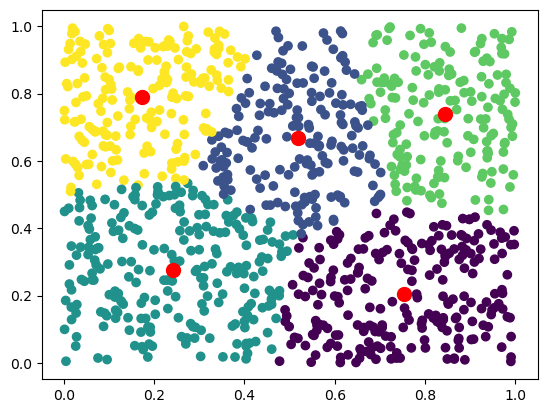

In [8]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=labels)
ax.scatter(centroids[:,0], centroids[:,1], color="red", s=100)

### Test on a random point

In [9]:
point = np.random.rand(2)

In [10]:
kmeans.predict_one(point)

0

In [11]:
# Verification of function output 
for i, centroid in enumerate(centroids):
    dist = ((centroid - point)**2).sum()**0.5
    print(f"Distance to centroid: {centroid} is {dist}")

Distance to centroid: [0.7542619  0.20529641] is 0.27575879131061865
Distance to centroid: [0.51965415 0.6693191 ] is 0.38922485949651753
Distance to centroid: [0.24298768 0.27671933] is 0.6353963555965643
Distance to centroid: [0.8444239  0.73995286] is 0.2761892020379333
Distance to centroid: [0.1736766 0.7894095] is 0.7508026665623797


## Test on shifted data (To test edge cases)

In [12]:
shift = 1.5
X = np.concatenate([
    # Following data is getting shifted clockwise as we read down
    np.random.rand(1000, 2),
    np.random.rand(1000, 2) + [0, shift],
    np.random.rand(1000, 2) + [shift, shift],
    # np.random.rand(1000, 2) + [shift, 0],
    # np.random.rand(1000, 2) + [shift, -shift],
    # np.random.rand(1000, 2) + [0, -shift],
    # np.random.rand(1000, 2) + [-shift, -shift],
    # np.random.rand(1000, 2) + [-shift, 0],
    # np.random.rand(1000, 2) + [-shift, shift],
])
n_clusters = 5

In [13]:
X.shape

(3000, 2)

In [14]:
kmeans_test = Kmeans(n_clusters).fit(X)

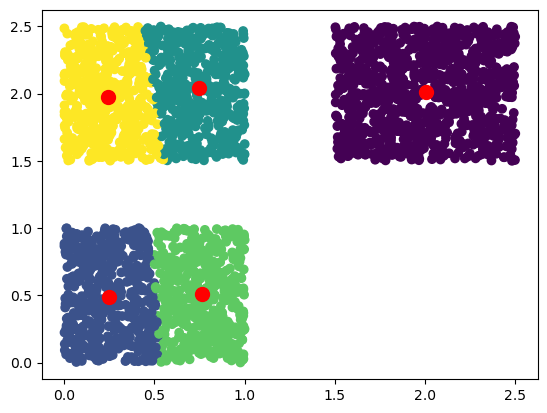

In [15]:
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=kmeans_test.labels)
ax.scatter(kmeans_test.centroids[:,0], kmeans_test.centroids[:,1], color="red", s=100)